# Exercícios para entrega (Prova)

## Questão 2

$p(x|\omega_{1}) \backsim \mathcal{N}(8, 1)$

$p(x|\omega_{2}) \backsim \mathcal{N}(10, 1)$

$P(\omega_{1}) = P(\omega_{2}) = \frac{1}{2}$

In [1]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
# Delimitação de dimensões para as figuras
X_MIN = 2
X_MAX = 16
N_PONTOS = 1000

$p(x | \omega_{i})$

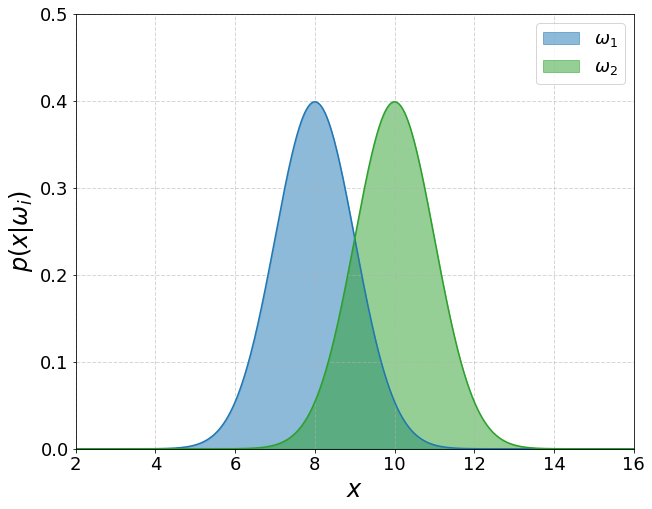

In [3]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 8
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_02_a1.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

$p(x | \omega_{i})\cdot P(\omega_{i})$

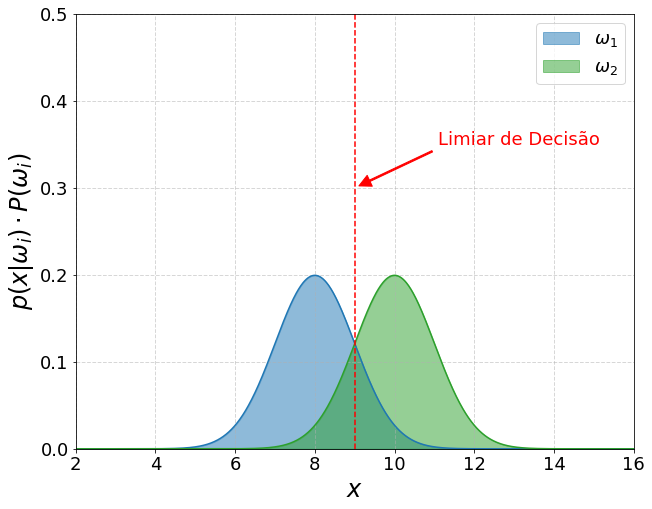

In [4]:
plt.figure(figsize=(10, 8))

# Para i=1
MEDIA = 8
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.5 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C0')
plt.fill_between(x, y, color='C0', alpha=0.5, label=r'$\omega_1$')

# Para i=2
MEDIA = 10
DESVIO_PADRAO = 1

x = np.linspace(X_MIN, X_MAX, N_PONTOS)
y = 0.5 * norm.pdf(x, MEDIA, DESVIO_PADRAO)

plt.plot(x, y, color='C2')
plt.fill_between(x, y, color='C2', alpha=0.5, label=r'$\omega_2$')

plt.legend(fontsize=18)
plt.grid(True, linestyle='--', linewidth=1.0, alpha=0.5)

# Plot do limiar de decisão
plt.axvline(x=9, linestyle='--', color='red')
plt.annotate('Limiar de Decisão', 
             xy=(9.0, 0.3), 
             xytext=(11.1, 0.35), 
             arrowprops=dict(facecolor='red', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='red'), 
             color='red', 
             fontsize=18)

# Ajustes extras do plot
plt.xlim(X_MIN, X_MAX)
plt.ylim(0.0, 0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$x$', fontsize=24)
plt.ylabel(r'$p(x | \omega_i)\cdot P(\omega_i)$', fontsize=24)

# Salvamento da figura em PDF
plt.savefig('ml_prova_02_a2.pdf',
            format='pdf',
            dpi=300,
            transparent=True,
            bbox_inches='tight')

# Exibicação 'limpa' da figura
plt.show()

### Simulando a classificação de N=1000 novas amostras

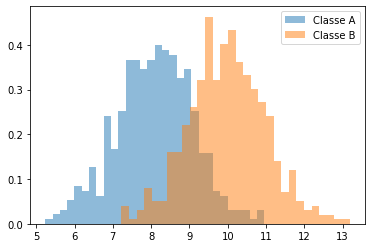

In [24]:
amostras_A = np.random.normal(8, 1, int(N_PONTOS/2))
amostras_B = np.random.normal(10, 1, int(N_PONTOS/2))
_, _, _ = plt.hist(amostras_A, 30, density=True, alpha=0.5, label='Classe A')
_, _, _ = plt.hist(amostras_B, 30, density=True, alpha=0.5, label='Classe B')
plt.legend()

In [25]:
def classificar(amostra, limiar):
    if amostra < limiar:
        return 0
    else:
        return 1

In [26]:
def classificar_conjunto(amostras, limiar):
    return np.array([classificar(amostra, limiar) for amostra in amostras])

In [46]:
def erros(classes_preditas, classe_correta):
    n_erros = 0
    for amostra in classes_preditas:
        if amostra != classe_correta:
            n_erros += 1
    taxa_de_erros = n_erros/len(classes_preditas)
    return n_erros, taxa_de_erros

In [50]:
pred_A = classificar_conjunto(amostras_A, limiar=9)
pred_B = classificar_conjunto(amostras_B, limiar=9)

In [53]:
erros_A = erros(classes_preditas=pred_A, classe_correta=0)

In [54]:
erros_B = erros(classes_preditas=pred_B, classe_correta=1)

In [55]:
erros_gerais = (erros_A[0] + erros_B[0], 0.5 * (erros_A[1] + erros_B[1]))

In [56]:
erros_gerais

(169, 0.16899999999999998)